In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

Load the iris dataset from sklearn and create an object X containing the explanatory variables and an object y containing the target variable.

In [2]:
iris = load_iris()
X = iris.data
y = iris.target
print(X[:5])
print(y[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


Keep only the first two columns of X and filter observations so that you only have two different classes for the target variable. This will make it easy to visualize our data, and the predictions of the model.

In [3]:
# Dataset for decision function visualization: we only keep the first two
# features in X and sub-sample the dataset to keep only 2 classes and
# make it a binary classification problem.

X_2d = X[:, :2] # keep first two features
X_2d = X_2d[y > 0] # remove class 0 observations from X
y_2d = y[y > 0] # remove class 0 observations from y
y_2d -= 1 # set values of y from {1,2} to {0,1}

Separate the data between a training set and a test set, and do any necessary preprocessing.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_2d, y_2d, test_size=0.3)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

What are the hyperparameters for a SVM with polynomial kernel? Are C and gamma still relevant? For each hyperparameter important for polynomial kernels, create a list containing a range of values that will be tested later in a grid search.

In [ ]:
C_range = [1e-2, 1, 1e2]
degree_range = [1, 2, 3, 4]
print(C_range)
print(degree_range)

[0.01, 1, 100.0]
[1, 2, 3, 4]


Create an empty list called classifiers, then loop over the lists of hyperparameter values you defined just above. For each combination of values, train an sklearn.svm.SVC model with a polynomial kernel.

In [6]:
classifiers = []
for C in C_range :
    for degree in degree_range :
        clf = SVC(C=C, degree=degree, kernel = 'poly')
        clf.fit(X_train, y_train)
        classifiers.append((C, degree, clf))

print(classifiers)

[(0.01, 1, SVC(C=0.01, degree=1, kernel='poly')), (0.01, 2, SVC(C=0.01, degree=2, kernel='poly')), (0.01, 3, SVC(C=0.01, kernel='poly')), (0.01, 4, SVC(C=0.01, degree=4, kernel='poly')), (1, 1, SVC(C=1, degree=1, kernel='poly')), (1, 2, SVC(C=1, degree=2, kernel='poly')), (1, 3, SVC(C=1, kernel='poly')), (1, 4, SVC(C=1, degree=4, kernel='poly')), (100.0, 1, SVC(C=100.0, degree=1, kernel='poly')), (100.0, 2, SVC(C=100.0, degree=2, kernel='poly')), (100.0, 3, SVC(C=100.0, kernel='poly')), (100.0, 4, SVC(C=100.0, degree=4, kernel='poly'))]


Use the np.meshgrid function and np.linspace function in order to create an object xx and an object yy both of shape (200,200) that uniformely map the two dimensional square defined by (x,y)∀x∈[−3,3],y∈[−3,3]

In [8]:
xx, yy = np.meshgrid(np.linspace(-3, 3, 200), np.linspace(-3, 3, 200))
print(xx)

[[-3.         -2.96984925 -2.93969849 ...  2.93969849  2.96984925
   3.        ]
 [-3.         -2.96984925 -2.93969849 ...  2.93969849  2.96984925
   3.        ]
 [-3.         -2.96984925 -2.93969849 ...  2.93969849  2.96984925
   3.        ]
 ...
 [-3.         -2.96984925 -2.93969849 ...  2.93969849  2.96984925
   3.        ]
 [-3.         -2.96984925 -2.93969849 ...  2.93969849  2.96984925
   3.        ]
 [-3.         -2.96984925 -2.93969849 ...  2.93969849  2.96984925
   3.        ]]


Use the function np.c_ in order to transform xx and yy into a list of coordinates (a list of [x,y]) mapping the space, and store it under the name sample_grid. You will need to transform xx and yy for this to work.

In [10]:
sample_grid = np.c_[xx.ravel(), yy.ravel()]
sample_grid

array([[-3.        , -3.        ],
       [-2.96984925, -3.        ],
       [-2.93969849, -3.        ],
       ...,
       [ 2.93969849,  3.        ],
       [ 2.96984925,  3.        ],
       [ 3.        ,  3.        ]])

Apply the method .decision_function from the seventh element of classifiers to sample_grid, what comes out ? Store this value in an object named Z. Check the decision_function documentation to learn more

In [11]:
_, _, classif = classifiers[6]
Z = classif.decision_function(sample_grid)
Z

array([-24.48059987, -24.31330827, -24.14717805, ...,  23.73881348,
        23.9049437 ,  24.0722353 ])

Plot -Z using the pcolormesh function, xx, yy, and cmap=plt.cm.RdBu

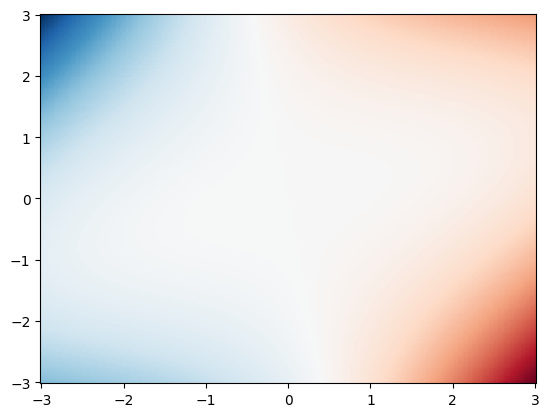

In [12]:
plt.pcolormesh(xx,yy,-Z.reshape(xx.shape),cmap=plt.cm.RdBu)

In order to put this in context, add to the same graph the coordinates of your observations with a different color for each category of y, you can use the argument : cmap=plt.cm.RdBu_r

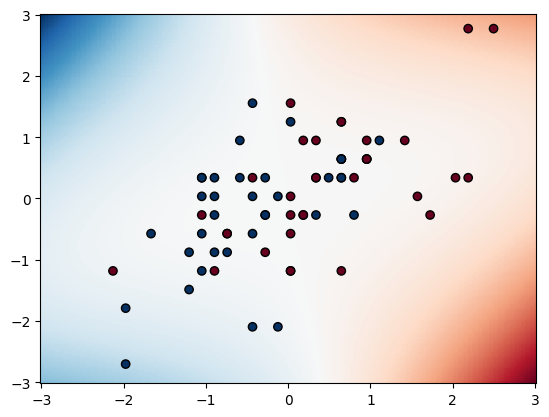

In [14]:
plt.pcolormesh(xx,yy,-Z.reshape(xx.shape),cmap=plt.cm.RdBu)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdBu_r,
                edgecolors='k')

Add another plot that draws the decision boundary of our model.

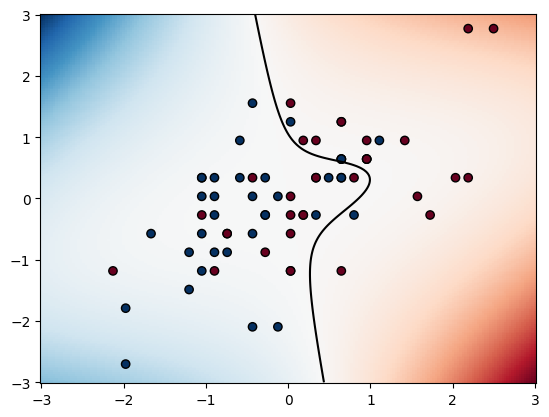

In [15]:
plt.pcolormesh(xx,yy,-Z.reshape(xx.shape),cmap=plt.cm.RdBu)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdBu_r,
                edgecolors='k')
plt.contour(xx,yy,Z.reshape(xx.shape), levels = [0.0], colors ="black")

Loop over enumerate(classifiers) to produce a similar figure for each of the different classifiers

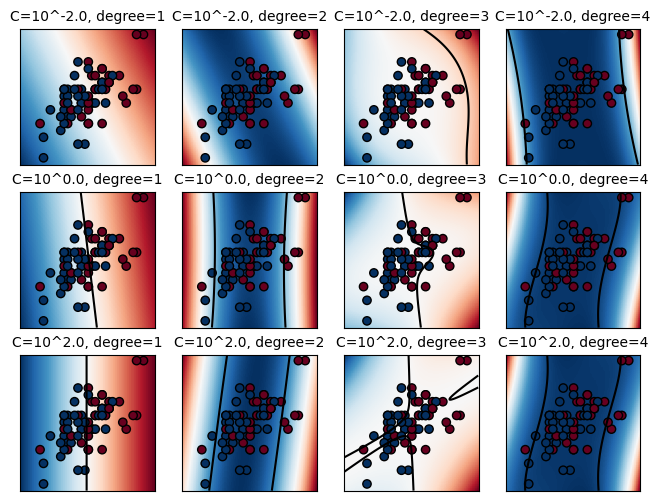

In [17]:
plt.figure(figsize=(8, 6))
for (k, (C, degree, clf)) in enumerate(classifiers):
    # evaluate decision function in a grid
    Z = clf.decision_function(sample_grid)
    Z = Z.reshape(xx.shape)

    # visualize decision function for these parameters
    plt.subplot(len(C_range), len(degree_range), k + 1)
    plt.title("C=10^{0}, degree={1}".format(np.log10(C), degree),
              size='medium')

    # visualize parameter's effect on decision function
    plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdBu_r,
                edgecolors='k')
    plt.contour(xx,yy,Z.reshape(xx.shape), levels = [0.0], colors ="black")
    plt.xticks(())
    plt.yticks(())
    plt.axis('tight')

Now replace the train sets with the test sets in the loop and look at the results. How do the parameters C and gamma influence the performances of the model ?

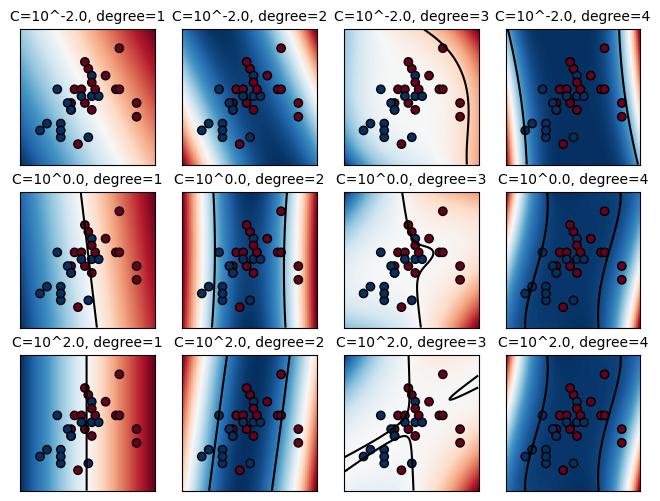

In [19]:
# Visualization
#
# draw visualization of parameter effects

plt.figure(figsize=(8, 6))
for (k, (C, degree, clf)) in enumerate(classifiers):
    # evaluate decision function in a grid
    Z = clf.decision_function(sample_grid)
    Z = Z.reshape(xx.shape)

    # visualize decision function for these parameters
    plt.subplot(len(C_range), len(degree_range), k + 1)
    plt.title("C=10^{0}, degree={1}".format(np.log10(C), degree),
              size='medium')

    # visualize parameter's effect on decision function
    plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.RdBu_r,
                edgecolors='k')
    plt.contour(xx,yy,Z.reshape(xx.shape), levels = [0.0], colors ="black")
    plt.xticks(())
    plt.yticks(())
    plt.axis('tight')


In the figure above, C is the inverse of the regularization strength and it influences how many observations will be misclassified in the train set.

The hyperparameter degree is actually the degree of the polynomial used as kernel. degree = 1 will always correspond to a linear classifier, regardless of the value of C. For higher values of degree, the model's decision boundary will become more and more complex. However, in this case C will counterbalance this effect (the lower is C, the more important the regularization, the more it compensates the effect of degree).

There's a balance to be found between degree and C. In practice, it's often difficult to determine what polynomial degree will be relevant for a given dataset, as it's usually not possible to visualize the decision boundary in the whole space of features. However, polynomial kernels can be very useful in some cases where you have an idea of the mathematical equations describing the phenomenon you're trying to model. For example, if you know that the target you want to estimate strongly depends on the square of some of your features, it might be interesting to try a polynomial kernel with degree = 2.